In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
mode = 2
# 1 - background color
# 2 - letter
# 3 - object color

use_strong = False

n = 10000
p = 0.85

n_neutral = 200

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

if mode == 1:
    from Heuristics import heuristic_1 as heuristic_base
    from Sample import sample_1 as sample
elif mode == 2:
    from Heuristics import heuristic_2 as heuristic_base
    from Sample import sample_2 as sample
elif mode == 3:
    from Heuristics import heuristic_3 as heuristic_base
    from Sample import sample_3 as sample
    
def heuristic(im, meta):
    return heuristic_base(im, meta, use_strong = use_strong)

from Explore import explore
from Heuristics import augment
from Load import load
from Model import get_model, loss

from Core import acc
from Train import train

In [4]:
# Create the datasets

X_train, X_val, X_test, X_neutral, Y_train, Y_val, Y_test, Y_neutral, meta_train, meta_val, meta_test = \
load(sample, n, p, n_neutral)


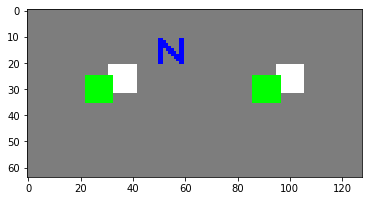

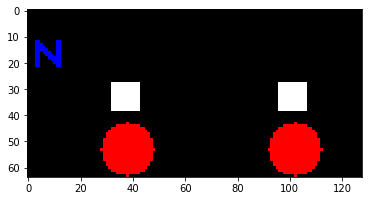

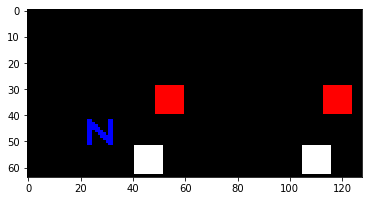

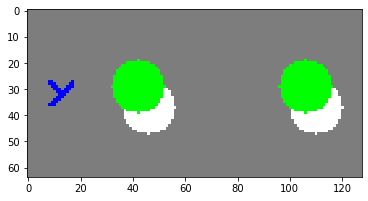

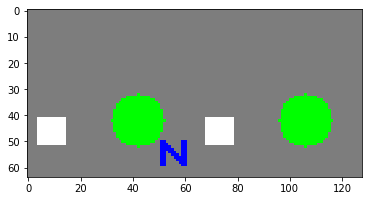

In [5]:
for index in range(5):
    x = X_train[index]
    meta = meta_train[index]
    x_h, _ = heuristic(x, meta)
    plt.imshow(np.hstack((x, x_h)))
    plt.show()
    plt.close()

In [6]:
# Train a model on the 'bad' dataset and evaluate on both

model = get_model()
train(model, loss, X_train, Y_train, X_val, Y_val, "Models/original")
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.6702442 0.51043767 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.46723625 0.44750008 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.4418885 0.42885017 -> saving
Epoch / Epoch Train Loss / Val Loss: 3 0.43269336 0.43147078
Epoch / Epoch Train Loss / Val Loss: 4 0.42646623 0.4258673 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.4189272 0.4277031
Epoch / Epoch Train Loss / Val Loss: 6 0.4137068 0.44301295
Epoch / Epoch Train Loss / Val Loss: 7 0.3995124 0.42389262 -> saving
Epoch / Epoch Train Loss / Val Loss: 8 0.38350505 0.4616636
Epoch / Epoch Train Loss / Val Loss: 9 0.36609212 0.4733179
Epoch / Epoch Train Loss / Val Loss: 10 0.3417789 0.44438493
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 11 0.28769052 0.49414554
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 12 0.26301187 0.5117484
Dropping learning_rate
Epoch / Epoch Train Loss / Val Loss: 13 0.25579074 0.45489523
Dropping learning_rate
Epoch / Epo


0


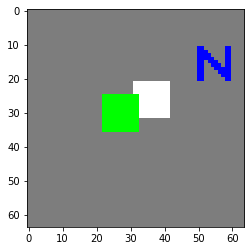

Initial Prediction:  [[False]]


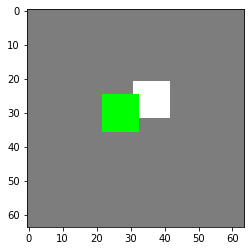

New Prediction:  [[ True]]


1


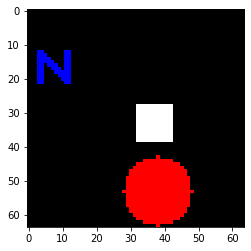

Initial Prediction:  [[False]]


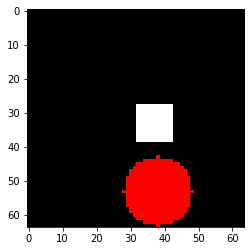

New Prediction:  [[ True]]


2


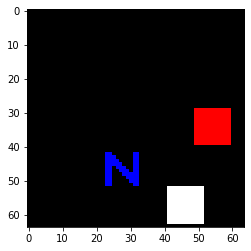

Initial Prediction:  [[False]]


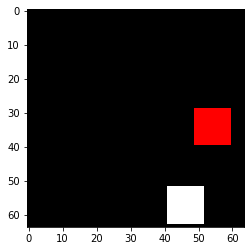

New Prediction:  [[ True]]

Hit max_display


In [7]:
# Check the heuristic's effectiveness

model.load_weights("Models/original")
explore(model, X_train, Y_train, meta_train, heuristic)

In [8]:
# Augment the training dataset using the heuristic

X_train_aug, Y_train_aug = augment(X_train, Y_train, meta_train, heuristic)

X_val_aug, Y_val_aug = augment(X_val, Y_val, meta_val, heuristic)

(7500, 64, 64, 3) (15000, 64, 64, 3)


In [9]:
# Fine-tune the model on the augmented data

model.load_weights("Models/original")
train(model, loss, X_train_aug, Y_train_aug, X_val_aug, Y_val_aug, "Models/new")
print()
print("Training Distribution Test Acc: ", acc(model, X_test, Y_test))
print("Neutral Distribution Test Acc: ", acc(model, X_neutral, Y_neutral))

Epoch / Epoch Train Loss / Val Loss: 0 0.5274233 0.5865214 -> saving
Epoch / Epoch Train Loss / Val Loss: 1 0.49453542 0.5610919 -> saving
Epoch / Epoch Train Loss / Val Loss: 2 0.45689365 0.54774356 -> saving
Epoch / Epoch Train Loss / Val Loss: 3 0.4010242 0.49570772 -> saving
Epoch / Epoch Train Loss / Val Loss: 4 0.3284278 0.44299474 -> saving
Epoch / Epoch Train Loss / Val Loss: 5 0.24854423 0.42649192 -> saving
Epoch / Epoch Train Loss / Val Loss: 6 0.15861651 0.24786896 -> saving
Epoch / Epoch Train Loss / Val Loss: 7 0.114108495 0.20715865 -> saving
Epoch / Epoch Train Loss / Val Loss: 8 0.0742191 0.18113884 -> saving
Epoch / Epoch Train Loss / Val Loss: 9 0.0671733 0.16895245 -> saving
Epoch / Epoch Train Loss / Val Loss: 10 0.042418823 0.16262509 -> saving
Epoch / Epoch Train Loss / Val Loss: 11 0.042727713 0.16576466
Epoch / Epoch Train Loss / Val Loss: 12 0.02980317 0.1639808
Epoch / Epoch Train Loss / Val Loss: 13 0.01942674 0.20275687
Dropping learning_rate
Epoch / Epoch 

Searching Training Set
Searched  100  images
Searching Testing Set

10


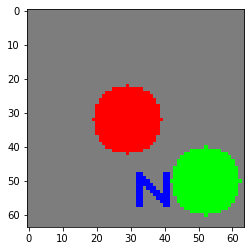

Initial Prediction:  [[False]]


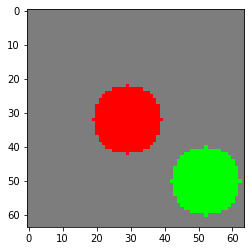

New Prediction:  [[ True]]


53


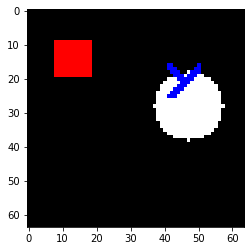

Initial Prediction:  [[False]]


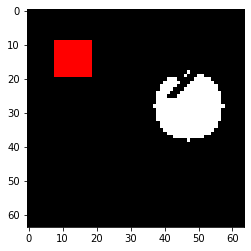

New Prediction:  [[ True]]


80


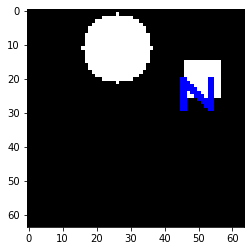

Initial Prediction:  [[False]]


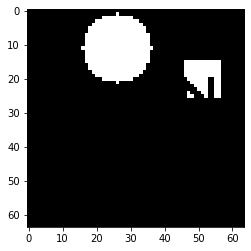

New Prediction:  [[ True]]

Hit max_display


In [10]:
# Check the heuristic's effectiveness on the new model

model.load_weights("Models/new")
print("Searching Training Set")
explore(model, X_train, Y_train, meta_train, heuristic)
print("Searching Testing Set")
explore(model, X_test, Y_test, meta_test, heuristic)